In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import splitfolders



In [3]:
input_folder = "rice_leaf_diseases"  # Update this with your actual dataset folder
output_folder = "diseases_data"  # The destination folder where split data will be stored

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.7, 0.2, 0.1), group_prefix=None)


Copying files: 120 files [00:00, 718.48 files/s]


In [4]:
train_dir = "diseases_data/train"
valid_dir = "diseases_data/val"
test_dir = "diseases_data/test"


In [5]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255, 
    rotation_range=30, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)


In [6]:
batch_size = 32
img_size = (128, 128)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 84 images belonging to 3 classes.
Found 24 images belonging to 3 classes.
Found 12 images belonging to 3 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
epochs = 25

history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=epochs
)


Epoch 1/25


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 651ms/step - accuracy: 0.3126 - loss: 1.2688 - val_accuracy: 0.3333 - val_loss: 1.1540
Epoch 2/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 280ms/step - accuracy: 0.3782 - loss: 1.1153 - val_accuracy: 0.5000 - val_loss: 1.0840
Epoch 3/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.4154 - loss: 1.0755 - val_accuracy: 0.6250 - val_loss: 1.0704
Epoch 4/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 275ms/step - accuracy: 0.4194 - loss: 1.0814 - val_accuracy: 0.5833 - val_loss: 1.0583
Epoch 5/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 265ms/step - accuracy: 0.3545 - loss: 1.1010 - val_accuracy: 0.5417 - val_loss: 1.0470
Epoch 6/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 300ms/step - accuracy: 0.3626 - loss: 1.0923 - val_accuracy: 0.3333 - val_loss: 1.0311
Epoch 7/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 305ms/step - accuracy: 0.3622 - loss: 1.0494 - val_accuracy: 0.6250 - val_loss: 1.0115
Epoch 8/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 313ms/step - accuracy: 0.4326 - loss: 1.1001 - val_accuracy: 0.3333 - val_loss: 1.0503
Epo

In [10]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.7500 - loss: 0.9515
Test Accuracy: 75.00%


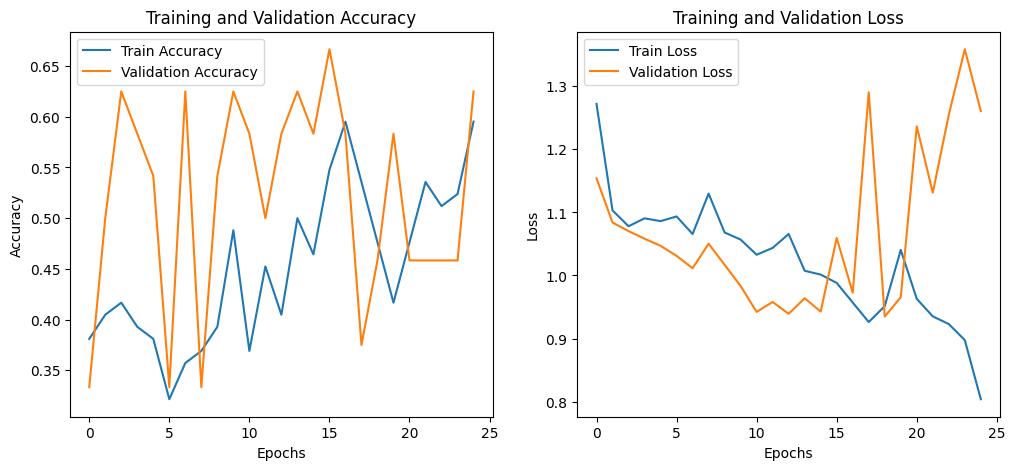

In [11]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


In [12]:
model.save("rice_disease_classifier.h5")


In [15]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

model = load_model("rice_disease_classifier.h5")

def predict_rice_disease(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_names = list(train_generator.class_indices.keys())
    predicted_class = class_names[np.argmax(prediction)]

    return predicted_class

# Example usage
img_path = "diseases_data/test/Leaf smut/DSC_0330.jpg"
print("Predicted Disease:", predict_rice_disease(img_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Disease: Leaf smut
